# Cyfrowe przetwarzanie sygnałów i obrazów 
**Jakub Fita** 259208 <br>
**Maksym Malicki** <br>
### Ćwiczenie 1.
Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych sygnałów. Program powinien umożliwiać obserwowanie wycinka
sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz
zapis dowolnego wycinka sygnału do pliku o podanej nazwie.

Fragment kodu odpowiadający za importowanie wykorzystywanych bibliotek:

In [28]:
import pandas as pd
import matplotlib.pyplot as plot
import plotly.express as px

Wczytywanie danych z pliku *ekg1.txt*

In [35]:
ekg1 = pd.read_csv('ekg_signals/ekg1.txt', names = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12'], sep= ' ')
ekg100 =  pd.read_csv('ekg_signals/ekg100.txt', names = [1])
ekg_noise = pd.read_csv('ekg_signals/ekg_noise.txt', sep = '\s+', names = ['time', 'values'])

Przypisanie odpowiednich częstotliwości sygnału *[Hz]*.

In [30]:
fs_ekg1 = 1000 
fs_ekg100 = 360
fs_noise = 360

Wyznaczenie wartości które będą przedstawione na osi x wykresów oraz wyświetlenie 4 pierwszych rekordów.

In [31]:
ekg1['t'] = ekg1.index / fs_ekg1
ekg100.index = ekg100.index / fs_ekg100
ekg_noise.index =  ekg_noise.index / fs_noise

ekg1 = ekg1.set_index('t')

ekg1.head(4)

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12
t,,,,,,,,,,,,
0.000,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.001,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.002,106,325,219,-219,-60,284,492,837,239,372,908,405
0.003,86,306,219,-214,-55,274,487,832,240,404,179,-63


Kod generujący interaktywny wykres z możliwością przesuwania, przybliżania, oddalania oraz zapisywania wycinków.

In [36]:
ekg1_plot = px.line(ekg1)
ekg1_plot.update_traces(line = dict(width = 1))
ekg1_plot.update_xaxes(title_text = 't[s]')
ekg1_plot.update_yaxes(title_text = 'U[mV]')
ekg1_plot.update_layout(title_text = 'EKG1 interactive plot', title_font_size = 17, title_x = 0.5)
ekg1_plot.show()

Kod generujący osobne wykresy dla każdego z wczytanych odprowadzeń z pliku *ekg1.txt*.

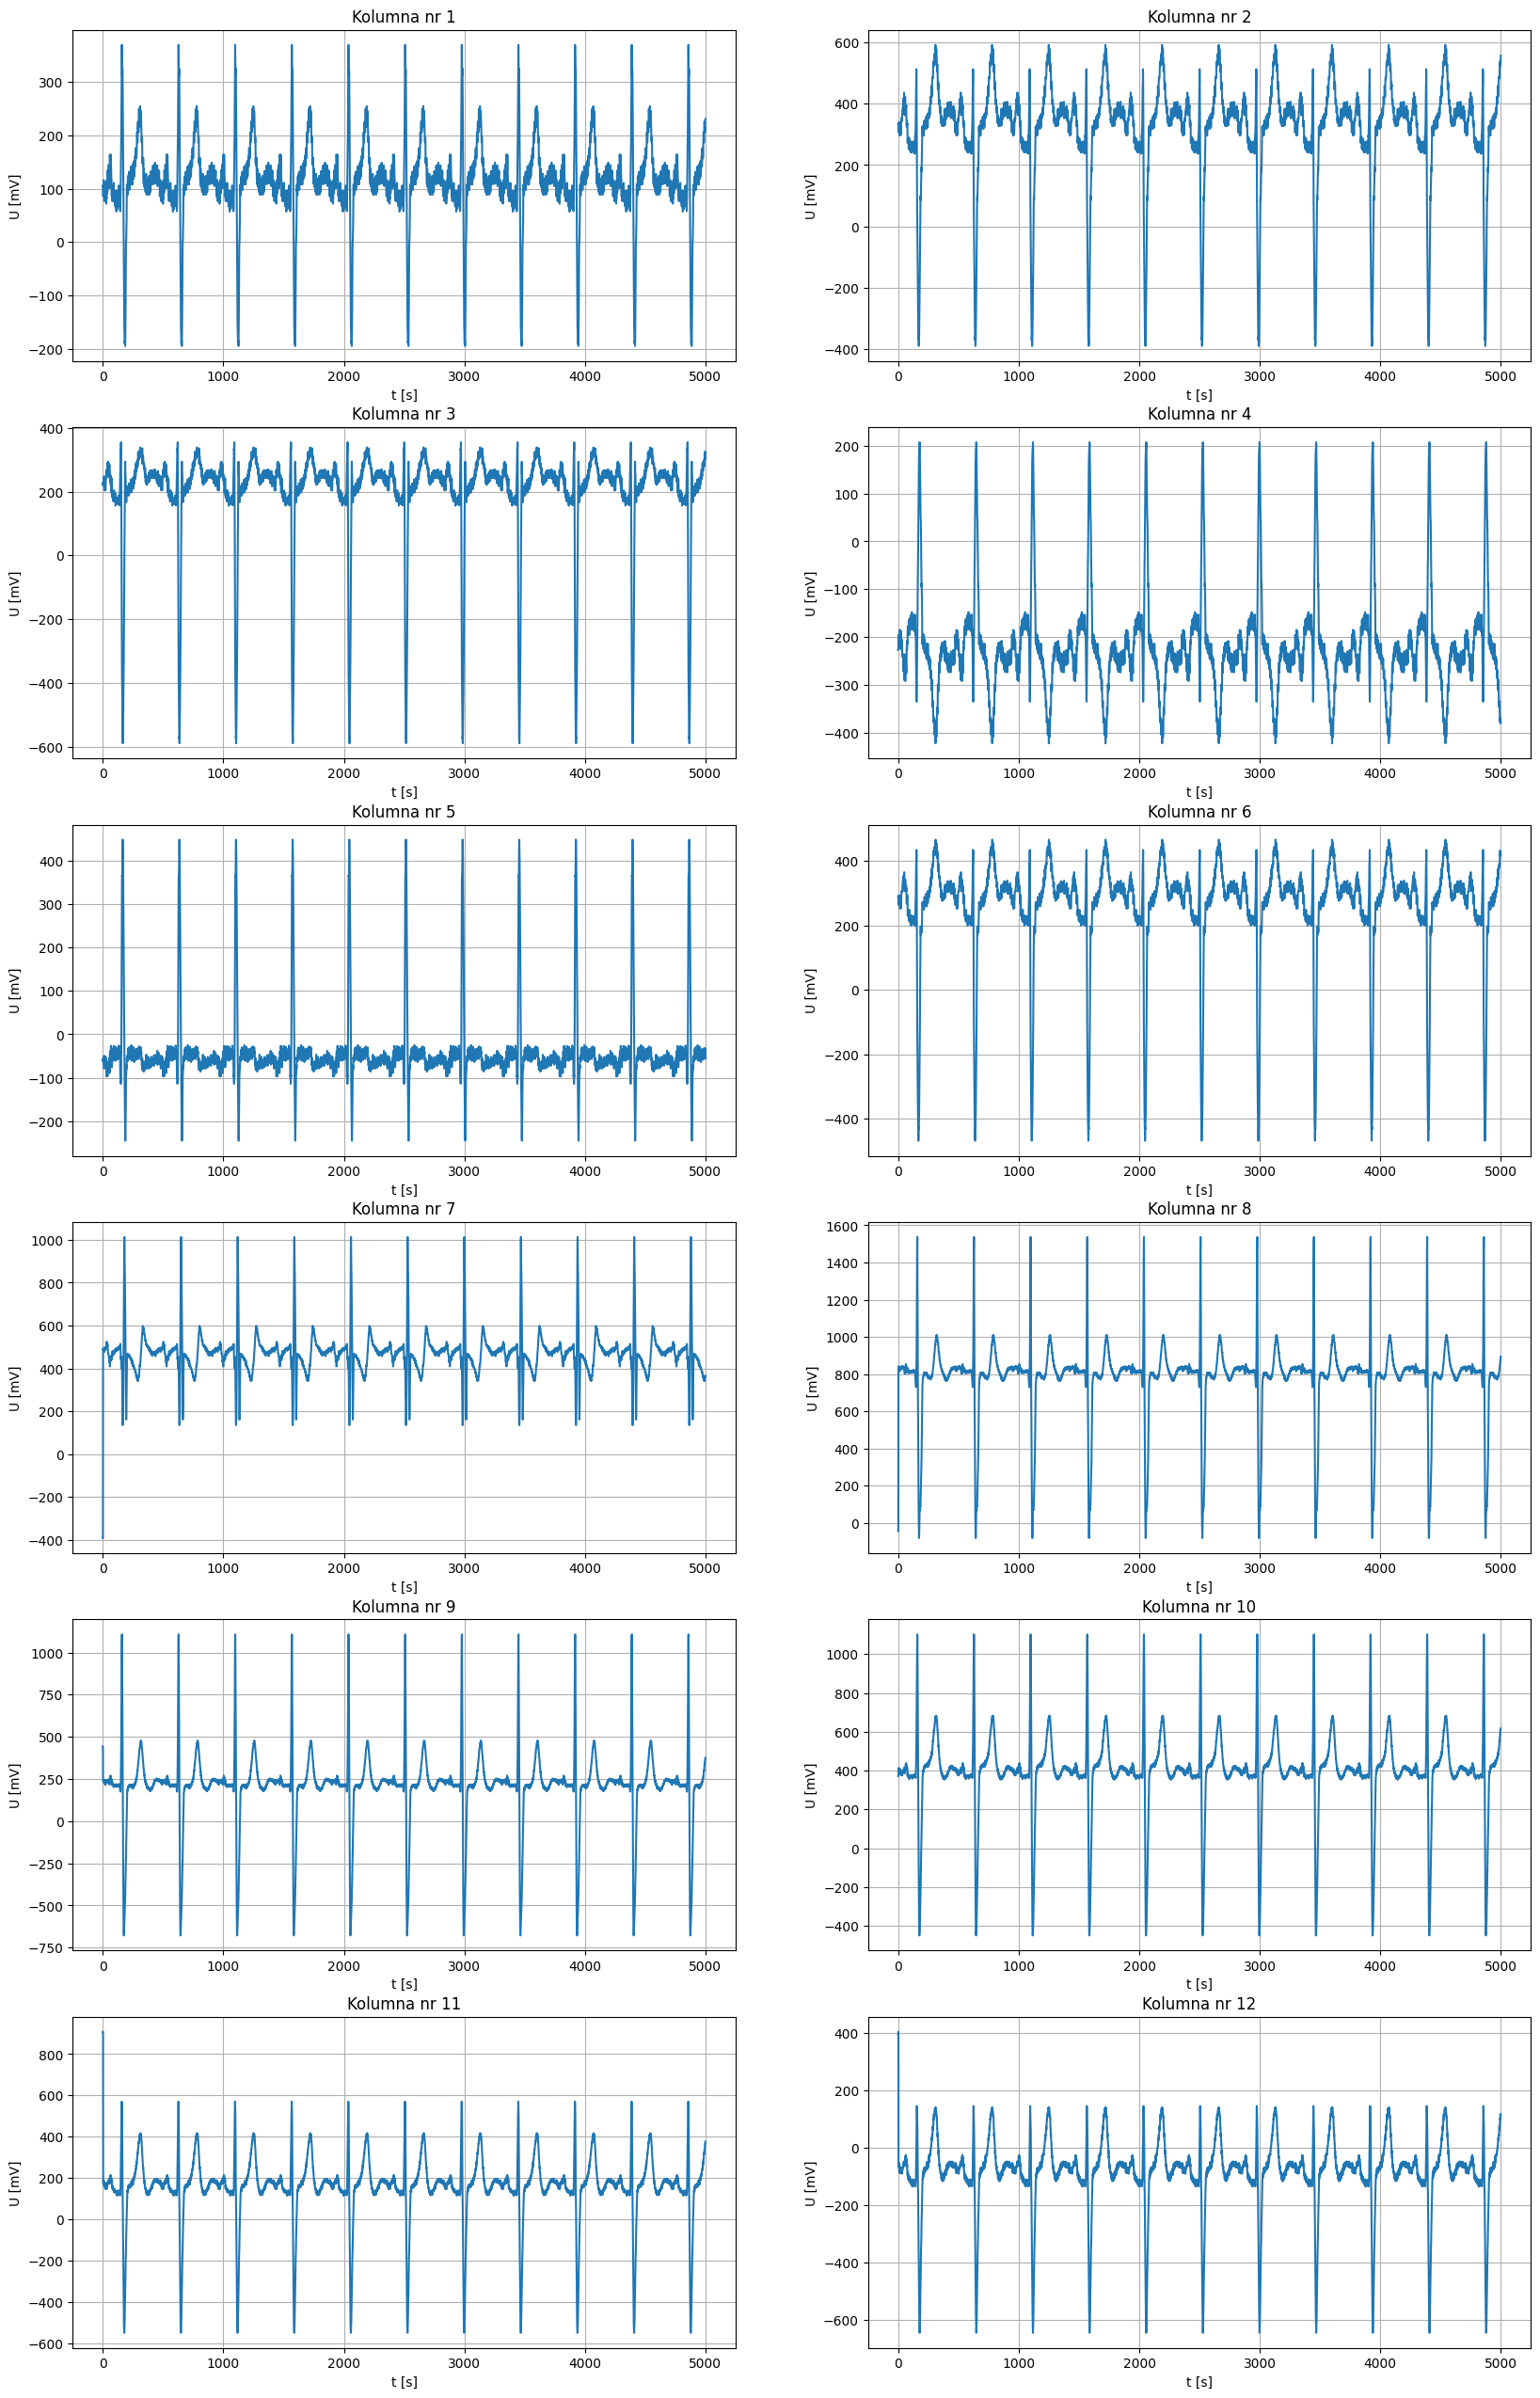

In [41]:
plot.figure(figsize=(20,32))
for i in range(1, 13):
    x = ekg1.index    
    y = ekg1[f'k{i}'] 
    plot.subplot(6, 2, i)  
    plot.plot(x, y)        
    plot.grid(axis='both') 
    plot.xlabel('t [s]')  
    plot.ylabel('U [mV]') 
    plot.title(f'Kolumna nr {i}') 